<a href="https://colab.research.google.com/github/bdfd/Section6.Project01-Car-Price-Predictor/blob/main/Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Pre-processing

In [ ]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Mounted at /content/drive
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.0/658.0 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/

In [ ]:
#Code to verify the package installation
try:
  import gspread
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [ ]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [ ]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Scikit-Learn Fundamental Packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor'
data_path =f'{work_dir}/data'
result_dir = f'{work_dir}/result'

In [ ]:
import os
if not os.path.exists(data_path):
  os.mkdir(data_path)

In [ ]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [ ]:
%cd '{work_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor


In [ ]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')

# Read the dataset - switch to second link if first one not work, OP mean On Progressing
# data_dir = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project_14OP-Campus_Placement_Prediction/main/dataset'
dataset_url_1 = 'quikr_car.csv'
# dataset_url_2 = 'Social_Network_Ads.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_path,dataset_url_1), encoding = 'utf-8')
# df2 = pd.read_csv(os.path.join(data_dir,dataset_url_2), encoding = 'utf-8')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
print(f'the dataset_1 size is {df.shape}.')

the dataset_1 size is (892, 6).


In [ ]:
# Check column name and categories
df.columns.values

array(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'],
      dtype=object)

In [ ]:
df.nunique()

name          525
company        48
year           61
Price         274
kms_driven    258
fuel_type       3
dtype: int64

In [ ]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [ ]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [ ]:
import table_nan_val as tnv

Your selected dataframe has 6 columns.
There are 2 columns that have missing values.


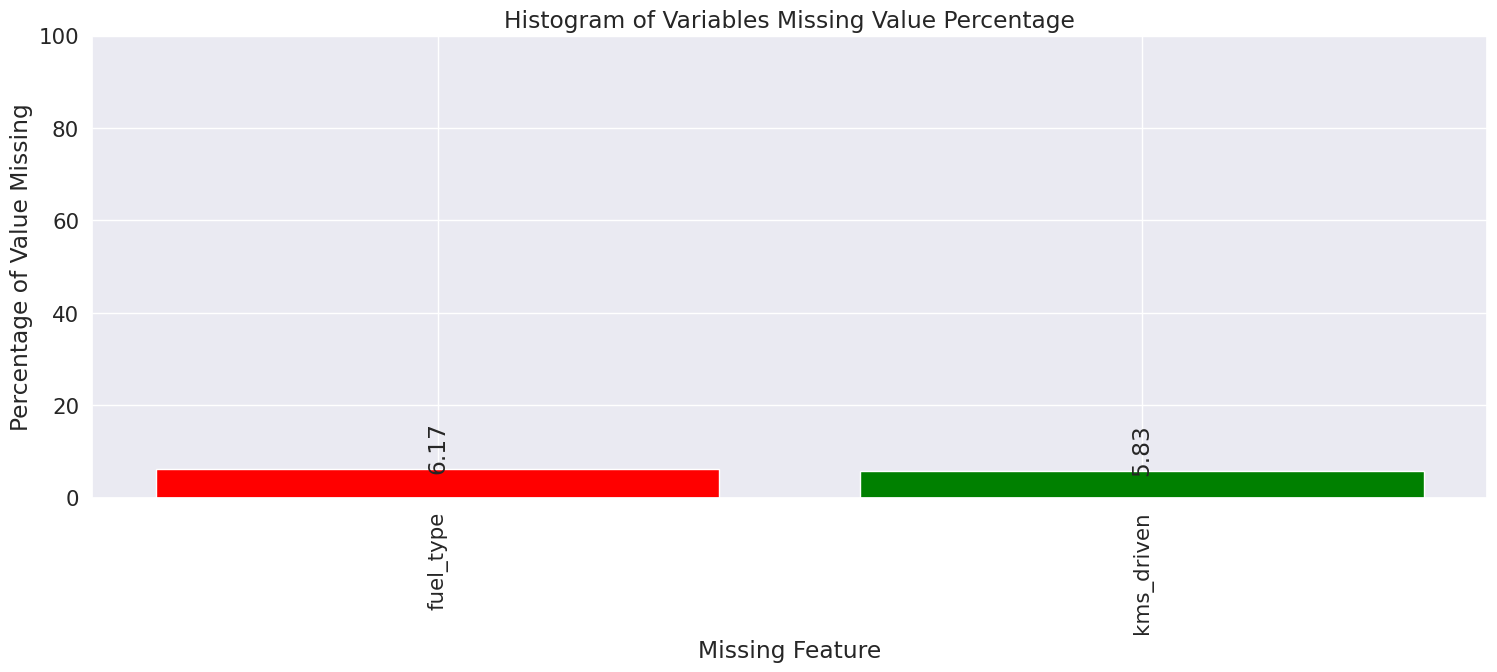

,index,Miss_Values,Miss_Rate,Available_Value
1,fuel_type,55,6.17,837
0,kms_driven,52,5.83,840


In [ ]:
tnv.Missing_Value_Analysis(df)

In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 103, (11.5%)



In [ ]:
backup = df.copy()
backup.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
#dataframe have 842 rows and 6 columns
backup.shape

(892, 6)

## Data Cleansing

Dataset Processing Procedure  
1) year has many non-year values  
2) year is in object. Change to integer  
3) Price has Ask for Price  
4) Price has commas in its prices and is in object  
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

In [ ]:
# delete the non-year values in column['year']
df=df[df['year'].str.isnumeric()]

In [ ]:
# change values in column['year'] as integer
# the dataframe have 842 row left over
df['year'] = df['year'].astype(int)
df.shape

(842, 6)

In [ ]:
# the dataframe have 819 row left over
df = df[df['Price'] != 'Ask For Price']
df.shape

(819, 6)

In [ ]:
# delete the 'Ask For Price' values in column['Price']
df['Price'].str.replace(',','').str.isnumeric().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
# replace the commas in prices and change the type into integer
# the dataframe have 819 rows left over
df['Price'] = df['Price'].str.replace(',','').astype(int)
df.shape

(819, 6)

In [ ]:
#replace the commas in kms_driven
df['kms_driven'] = df['kms_driven'].str.split().str.get(0).str.replace(',','')
df.shape

(819, 6)

In [ ]:
# delete the 'Petrol' value in column['kms_driven']
# the dataframe have 817 rows left over
df = df[df['kms_driven'] != 'Petrol']
df.shape

(817, 6)

In [ ]:
df['kms_driven'] = df['kms_driven'].astype(int)
df.shape

(817, 6)

In [ ]:
# delete the nan value in column['fuel_type]
df = df[~df['fuel_type'].isna()]
df.shape

(816, 6)

In [ ]:
df['name']

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [ ]:
# keep only the first three words in column['name']
df['name'] = df['name'].str.split(' ').str[:3].str.join(' ')

In [ ]:
df.columns.values

array(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'],
      dtype=object)

In [ ]:
df = df.reset_index(drop=True)
df.shape

(816, 6)

In [ ]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
%cd '{result_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor/result
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/Project01-Car Price Predictor/result


In [ ]:
df.to_csv('Car_Preprocessed_Data.csv')

In [ ]:
# df_target_variable = df['status']
# df = df.drop('status',axis=1)
# df = pd.get_dummies(df)
# df = pd.concat([df, df_target_variable], axis=1)
# df.head(3)